<a href="https://colab.research.google.com/github/meetdarbar93/AI-ML-Internship/blob/main/Day5/Day5_ML_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

load dataset

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)


spilt dataset

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Train a Simple Model (Decision Tree)**


#example for Classification

In [3]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(model.get_params())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


(120, 4)
(30, 4)
(120,)
(30,)
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<Axes: >

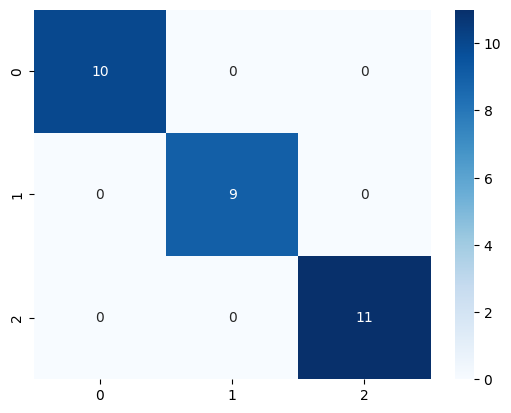

In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')


#example for Regression

In [5]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.0
MSE: 0.0
R2 Score: 1.0


#K-Nearest Neighbors for classification

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 1.0


#Visualize classification with scatter plot



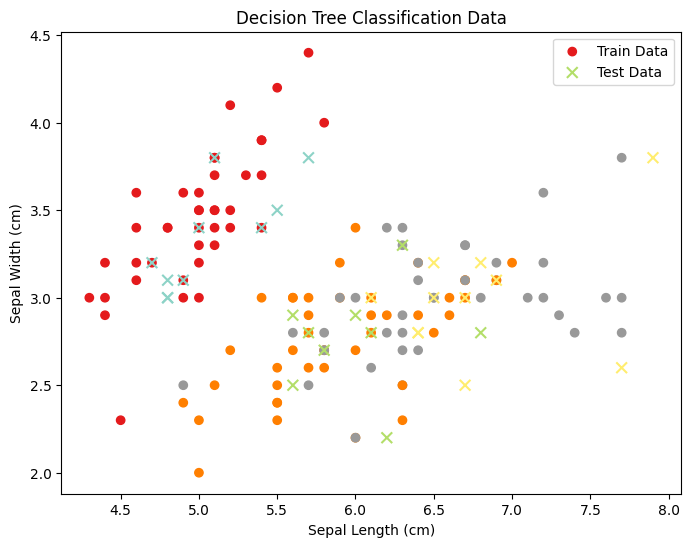

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

X_vis = X_train.iloc[:, :2]
y_vis = y_train

model = DecisionTreeClassifier(random_state=42)
model.fit(X_vis, y_vis)

y_pred = model.predict(X_test.iloc[:, :2])

plt.figure(figsize=(8,6))
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1],
            c=y_vis, cmap=plt.cm.Set1, label='Train Data')

# Plot test data - X markers
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1],
            c=y_test, cmap=plt.cm.Set3, marker='x', s=60, label='Test Data')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Decision Tree Classification Data')
plt.legend()
plt.show()


#visualize  regression with scatterplot

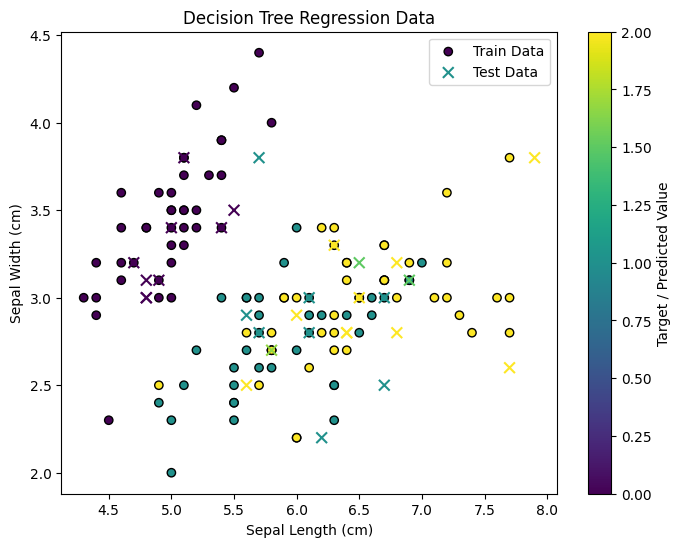

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

X_vis = X_train.iloc[:, :2]
y_vis = y_train

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_vis, y_vis)

y_pred_reg = regressor.predict(X_test.iloc[:, :2])

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1],
                      c=y_vis, cmap='viridis', label='Train Data', edgecolor='k')

# Plot test data (as X markers, color = predicted value)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1],
            c=y_pred_reg, cmap='viridis', marker='x', s=60, label='Test Data')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Decision Tree Regression Data')
plt.colorbar(scatter, label='Target / Predicted Value')
plt.legend()
plt.show()
